In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("Admission_Predict.csv")

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(400, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(columns=["Serial No."], inplace=True)

In [12]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [15]:
X= df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [16]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
X_train_scaled.shape

(320, 7)

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [108]:
class Model(nn.Module): #inharite from nn.module class to access the offereing of this class

  def __init__(self, num_features):# build a constructor and inside it we have to give how many features are in the input

    super().__init__()    #invoke/call parents class constructor
    self.fc1=nn.Linear(num_features,14)
    self.relu=nn.ReLU()
    self.fc3=nn.Linear(14,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,features):
    out=self.fc1(features)
    out=self.relu(out)
    out=self.fc3(out)
    out=self.sigmoid(out)
    return out

In [109]:
model=Model(X_train_scaled.shape[1])

In [110]:
!pip install torchinfo

from torchinfo import summary
summary(model,input_size=(X_train_scaled.shape[1],7))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [7, 1]                    --
├─Linear: 1-1                            [7, 14]                   112
├─ReLU: 1-2                              [7, 14]                   --
├─Linear: 1-3                            [7, 1]                    15
├─Sigmoid: 1-4                           [7, 1]                    --
Total params: 127
Trainable params: 127
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ------------------------------
# Convert numpy arrays → torch tensors
# ------------------------------
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

# ------------------------------
# Build model
# ------------------------------
model = Model(X_train_scaled.shape[1])

# Loss & optimizer
criterion = nn.MSELoss()                     # because output is sigmoid
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Train loop
# ------------------------------
epochs = 700
train_losses=[]
for epoch in range(epochs):
    model.train()
    
    # forward pass
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    # print occasionally
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# ------------------------------


Epoch 10/700, Loss: 0.0909
Epoch 20/700, Loss: 0.0809
Epoch 30/700, Loss: 0.0722
Epoch 40/700, Loss: 0.0645
Epoch 50/700, Loss: 0.0579
Epoch 60/700, Loss: 0.0519
Epoch 70/700, Loss: 0.0462
Epoch 80/700, Loss: 0.0407
Epoch 90/700, Loss: 0.0353
Epoch 100/700, Loss: 0.0303
Epoch 110/700, Loss: 0.0259
Epoch 120/700, Loss: 0.0221
Epoch 130/700, Loss: 0.0189
Epoch 140/700, Loss: 0.0164
Epoch 150/700, Loss: 0.0144
Epoch 160/700, Loss: 0.0130
Epoch 170/700, Loss: 0.0119
Epoch 180/700, Loss: 0.0111
Epoch 190/700, Loss: 0.0106
Epoch 200/700, Loss: 0.0102
Epoch 210/700, Loss: 0.0099
Epoch 220/700, Loss: 0.0096
Epoch 230/700, Loss: 0.0094
Epoch 240/700, Loss: 0.0091
Epoch 250/700, Loss: 0.0089
Epoch 260/700, Loss: 0.0087
Epoch 270/700, Loss: 0.0085
Epoch 280/700, Loss: 0.0084
Epoch 290/700, Loss: 0.0082
Epoch 300/700, Loss: 0.0080
Epoch 310/700, Loss: 0.0078
Epoch 320/700, Loss: 0.0077
Epoch 330/700, Loss: 0.0075
Epoch 340/700, Loss: 0.0073
Epoch 350/700, Loss: 0.0071
Epoch 360/700, Loss: 0.0069
E

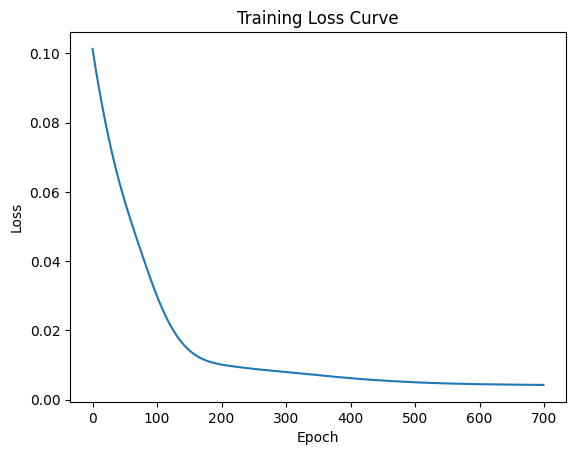

In [116]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


In [117]:
y_pred= model(X_test_t)

In [118]:
from sklearn.metrics import r2_score

y_true = y_test_t.detach().numpy()
y_pred_np = y_pred.detach().numpy()

print("R2 Score:", r2_score(y_true, y_pred_np))


R2 Score: 0.7099476456642151
